# Importing Important libraries

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.5MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 1.0MB 29.2MB/s 
     |████████████████████████████████| 194kB 51.6MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 92kB 13.4MB/s 
     |████████████████████████████████| 40kB 7.4MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 2.6MB 40.8MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
from fastai.torch_basics import *
from fastai.data.all import *
from fastai.vision.core import *
from fastai.vision.all import *
from fastai.vision import *
from fastai import *
import fastai

In [ ]:
cd /content/gdrive/My Drive/Internship challange

/content/gdrive/My Drive/Internship challange


In [ ]:
fastai.__version__

'2.0.16'

In [ ]:
# Checking CUDA is enabled or not
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

1.6.0+cu101
True
True


# Prepare dataset for training

In [ ]:
# Load test and validation set
train = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=Resize(128, ResizeMethod.Squish),
   batch_tfms=Normalize.from_stats(*imagenet_stats))

In [ ]:
path = "./TRAIN"
dls = train.dataloaders(path)

# Simple visualizations

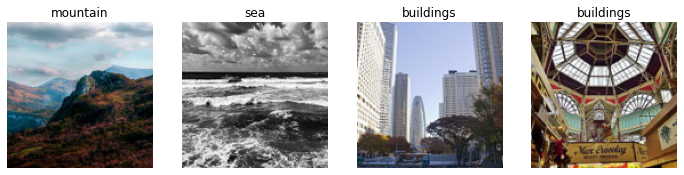

In [ ]:
# Visualize
dls.train.show_batch(max_n=4, nrows=1)

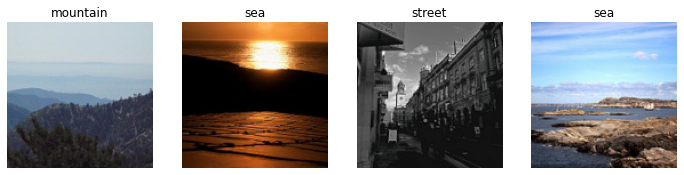

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
dls.vocab

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Loading imagenet trained model

In [ ]:
fscore = FBeta(average='macro', beta=1)

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=fscore)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


# Finding learning rate to tune

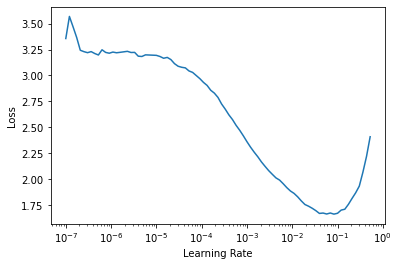

In [ ]:
lr_min, lr_steep = learn.lr_find()

# Fit on model by chosing most steep lr without unfreezing imagenet weights

In [ ]:
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,fbeta_score,time
0,0.484884,0.333452,0.891298,19:20
1,0.265615,0.294994,0.903971,00:47


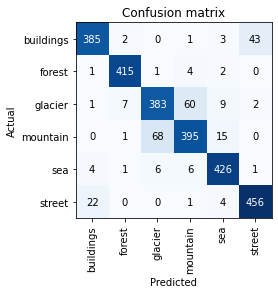

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

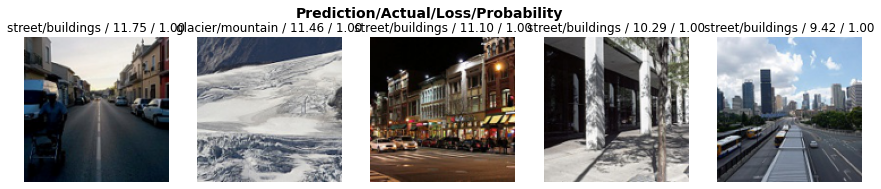

In [ ]:
interp.plot_top_losses(5, nrows=1)

# Fit by unfreeze weights

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(10, lr_max = slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,fbeta_score,time
0,0.393064,1.132632,0.820920,00:52
1,0.702336,0.759927,0.760115,00:53
2,0.754296,0.893373,0.676889,00:53
3,0.514906,0.476936,0.845619,00:54
4,0.423947,0.453077,0.859351,00:54
5,0.309691,0.437917,0.851900,00:54
6,0.267606,0.324148,0.887141,00:54
7,0.161529,0.316331,0.897530,00:54
8,0.093713,0.346163,0.899202,00:55
9,0.063596,0.362017,0.899567,00:54


# Saving and loading models

In [ ]:
learn.save('initial')

Path('models/initial.pth')

In [ ]:
learn.load('initial')

# Loading test data for prediction

In [ ]:
test_dl = dls.test_dl(get_image_files('./TEST'))

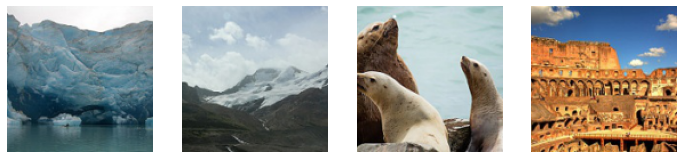

In [ ]:
test_dl.show_batch(max_n=4, nrows=1)

In [ ]:
vocab = dls.vocab

# Doing prediction and creating submission.csv

In [ ]:
predictions, *_  = learn.get_preds(dl=test_dl)

In [ ]:
labels = np.argmax(predictions, 1)

In [ ]:
classes = [vocab[i] for i in labels]

In [ ]:
import pandas as pd
import os

lists_fol = os.listdir("./TEST")

data = {"Filename": lists_fol,
        "Labels": classes

        }

df = pd.DataFrame (data, columns = ["Filename","Labels"])
df.to_csv("subs_test.csv",index=False)